# Module 10: Time Series

<sub><sup>The notebook is prepared based on the 11th chapter of McKinney's (2017) Python for Data Analysis book and the [Data Quest tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/).</sup></sub>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction

Time series data is an important form of structured data in many different fields, such as finance, economics, education, physics, etc.

Anything observed or measured at many points in time forms a time series.

Many time series are **fixed frequency**, which is to say that data points occur at *regular intervals* according to some rule, such as every 15 seconds, every 5 minutes, or once per month. Examples of fixed frequency can be hourly weather measurements, daily counts of web site visits, or monthly sales totals. 

Time series can also be **irregular** without a fixed unit of time or offset between units, for example, timestamped data in a computer system’s event log.


How you mark and refer to time series data depends on the application, and you may have one of the following:

* *Timestamps* - specific instants of time
* *Fixed periods* - months (eg - Jan 2017) or full year (eg - 2010)
* *Intervals of time* - defined by start and end timestamp. 

Among these, the simplest and most widely used kind of time series are
those indexed by *timestamp*.


`pandas` provides many built-in time series tools and data algorithms. You can efficiently
work with very large time series and easily slice and dice, aggregate, and
resample irregular- and fixed-frequency time series

## 2. Date and Time Data Types and Tools
The Python standard library includes data types for date and time data, as well as calendar-related functionality. 

The `datetime`, `time`, and `calendar` modules are the
main places to start. 

The `datetime.datetime` type, or simply `datetime`, is widely used. 
It is a Python's built-in module that supplies classes for manipulating dates and times.

The main focus of `datetime` is to make it less complicated to access attributes of the objects related to dates, times, and time zones. 

After importing `datetime` module, you can display the current date and time, and extract more specific data about the year, month, and day.

In [43]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2022, 5, 24, 11, 48, 31, 220253)

In [44]:
now.year, now.month, now.day

(2022, 5, 24)

`datetime` stores both the date and time down to the *microsecond*. 

### 2.1. Difference between DateTimes

`timedelta` represents the temporal difference between two `datetime` objects. 

If you take a difference between two datetime objects, the result will be a `timedelta` object:

In [45]:
delta = datetime.now() - datetime(1984, 8, 14, 8, 15)
delta

datetime.timedelta(days=13797, seconds=12811, microseconds=744121)

In [46]:
delta.days/365

37.8

In [47]:
delta.seconds

12811

You can add (or subtract) a `timedelta` to a `datetime` object to yield a new shifted object:

In [48]:
from datetime import timedelta
start = datetime(2011, 1, 20)
start + timedelta(days = 5)


datetime.datetime(2011, 1, 25, 0, 0)

In [49]:
start-2*timedelta(3)

datetime.datetime(2011, 1, 14, 0, 0)

### 2.2. Converting Between String and Datetime
You can format datetime objects and pandas timestamp objects as *strings* using `str` or the `strftime` method, passing a format specification:

In [50]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

In [51]:
stamp.strftime('%y-%m-%d')

'11-01-03'


Commonly used DateTime format specifications are provided below.

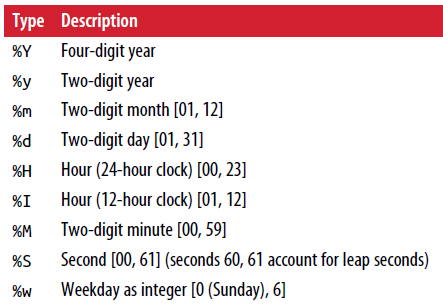

You can use these same format codes to convert strings to dates using `datetime.strptime`:

In [52]:
value = '2011-01-03'

#the formating has to match the format of the date value
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [53]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

`datetime.strptime` is a good way to parse a date with a *known format*. 

However, it can be a bit annoying to have to write a format specification each time, especially for common date formats.

The pandas' `to_datetime` method parses many different kinds of date representations. `pandas` is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame.

In [54]:
import pandas as pd

datestrs = ['Jan 13, 1997 10:45 PM', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['1997-01-13 22:45:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

`NaT` (*Not a Time*) is pandas’s null value for timestamp data.

In [55]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['1997-01-13 22:45:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [56]:
idx[2]

NaT

In [57]:
pd.isnull(idx)

array([False, False,  True])

### **Inclass Exercise**

**The Data Set: Open Power Systems Data**

The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* **Date** — The date (yyyy-mm-dd format)
* **Consumption** — Electricity consumption in GWh
* **Wind** — Wind power production in GWh
* **Solar** — Solar power production in GWh
* **Wind+Solar** — Sum of wind and solar power production in GWh

We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools.


First, we use the `read_csv()` function to read the data into a DataFrame, and then display its shape.

In [58]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017. 

To see what the data looks like, let’s use the `head()` and `tail()` methods to display the first three and last three rows.

In [59]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [60]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


## 3. Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to index
data by timestamps. 

For example, we can construct a Series object that has time-indexed
data:

In [61]:
import numpy as np

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.406160
2011-01-05   -1.889639
2011-01-07   -0.839020
2011-01-08    1.150499
2011-01-10   -0.967787
2011-01-12    0.847632
dtype: float64

Under the hood, these datetime objects have been put in a `DatetimeIndex`:

In [62]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

In [63]:
ts[::2]
#Recall that ts[::2] selects every second element in ts.

2011-01-02    1.406160
2011-01-07   -0.839020
2011-01-10   -0.967787
dtype: float64

In [64]:
10 + ts[::2]

2011-01-02    11.406160
2011-01-07     9.160980
2011-01-10     9.032213
dtype: float64

### **Inclass Exercise**

Our data set `opsd_daily` does not have an index of `DatatimeIndex`.

The first column in the dataset holds the timestamps values. We can set this column as the index column when importing the data:

In [65]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col = 0, parse_dates= True)
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


Now that our DataFrame’s index is a `DatetimeIndex`, we can use all of pandas’ powerful time-based indexing to wrangle and analyze our data.

Another useful aspect of the `DatetimeIndex` is that the individual date/time components are all available as attributes such as year, month, day, and so on. 

Let’s add a few more columns to `opsd_daily`, containing the year, month, and weekday name.

In [66]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

In [67]:
opsd_daily.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


### 3.1 Generating a Date Range

You can use the `date_range()` function to create a sequence of uniformly spaced datetimes.

This function generates a `DatetimeIndex` with an indicated length according to a particular frequency. By default the frequency is per day. 

For example, the following statement will produce `DatetimeIndex` containing the days between the indicated dates:

In [68]:
index = pd.date_range('2012-04-01', '2012-05-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01'],
              dtype='datetime64[ns]', freq='D')

The resulting `DatetimeIndex` has an attribute freq with a value of **`D`**, indicating daily frequency. By default, `date_range` generates daily timestamps. 

Available frequencies in pandas include hourly `H`, calendar daily `D`, business daily `B`, weekly `W`, monthly `M`, quarterly `Q`, annual `A`, and many others. 

Frequencies can also be specified as multiples of any of the base frequencies, for example `5D` for every five days.

As another example, let’s create a date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.

In [69]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

For example, the following will create an index per 4 hours (`4H`) between the indicated datetimes:

In [70]:
pd.date_range('2022-01-01', '2022-01-02', freq = '4H')

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 04:00:00',
               '2022-01-01 08:00:00', '2022-01-01 12:00:00',
               '2022-01-01 16:00:00', '2022-01-01 20:00:00',
               '2022-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

Similarly, you can pass frequency strings, like '`1h30min`', that will effectively be
parsed to the same expression:

In [71]:
pd.date_range('2000-01-01', periods = 10, freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

**Week of month dates**

One useful frequency class is “week of month,” starting with `WOM`. This enables you to get dates like the third Friday of each month:

In [72]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 3.2. Indexing, Selection, Subsetting
Time series behaves like any other pandas Series when you are indexing and selecting data based on label:

In [73]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [74]:
ts[stamp]

-0.839020492647323

As a convenience, you can also pass a string that is interpretable as a date:

In [75]:
ts['1/10/2011']

-0.9677865122603118

In [76]:
ts['20110110']

-0.9677865122603118

Let's create a longer Series dataset using the `data_range` function:

In [77]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    0.685653
2000-01-02   -0.997130
2000-01-03   -1.434551
2000-01-04   -1.798100
2000-01-05    2.893581
2000-01-06   -0.619736
2000-01-07   -0.600740
2000-01-08    0.475938
2000-01-09   -0.724573
2000-01-10    0.561536
Freq: D, dtype: float64

For longer time series, a year or only a year and month can be passed to easily select slices of data. 

Below, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:

In [78]:
longer_ts['2001']

2001-01-01    0.210186
2001-01-02   -2.850266
2001-01-03    0.663248
2001-01-04   -0.562171
2001-01-05    1.042899
                ...   
2001-12-27    0.213007
2001-12-28    0.476474
2001-12-29   -0.432669
2001-12-30   -0.372830
2001-12-31    1.174406
Freq: D, Length: 365, dtype: float64

In [79]:
longer_ts['2001-05']

2001-05-01    1.099845
2001-05-02   -1.075381
2001-05-03   -1.268317
2001-05-04    0.496353
2001-05-05   -0.079466
2001-05-06    0.605567
2001-05-07    0.103870
2001-05-08   -0.650547
2001-05-09    0.033682
2001-05-10    0.152514
2001-05-11   -0.677203
2001-05-12    1.544327
2001-05-13   -0.066353
2001-05-14   -0.318835
2001-05-15    1.297326
2001-05-16    0.469964
2001-05-17   -1.047246
2001-05-18   -0.920051
2001-05-19   -0.917088
2001-05-20    0.116203
2001-05-21    0.081972
2001-05-22    0.441104
2001-05-23   -0.179110
2001-05-24   -0.368646
2001-05-25    2.727269
2001-05-26   -0.792120
2001-05-27   -1.652131
2001-05-28   -1.112233
2001-05-29   -1.166834
2001-05-30   -0.673953
2001-05-31   -0.557365
Freq: D, dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps in a time series to perform a range query:

In [80]:
longer_ts['1/20/2000':'2/5/2000']

2000-01-20   -0.276052
2000-01-21    0.098967
2000-01-22    0.803083
2000-01-23   -0.441380
2000-01-24   -1.225888
2000-01-25   -1.085792
2000-01-26   -1.936553
2000-01-27   -0.195122
2000-01-28    0.123129
2000-01-29   -0.943222
2000-01-30    0.105903
2000-01-31   -0.604859
2000-02-01    0.079200
2000-02-02   -1.108143
2000-02-03    0.331735
2000-02-04   -1.580019
2000-02-05    0.271979
Freq: D, dtype: float64

As before, you can pass either a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays. 

This means that no data is copied and modifications on the slice will be reflected in the original data.

There is an equivalent method for instance as well called `truncate`, which slices Series between two dates.

In [81]:
ts.truncate(after='1/9/2011')

2011-01-02    1.406160
2011-01-05   -1.889639
2011-01-07   -0.839020
2011-01-08    1.150499
dtype: float64

All of the above holds true for DataFrame as well, based on indexing on its rows. This will be illustrated in the exercise below.

### **Inclass Exercise**

With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the `loc` accessor. 

The indexing works similar to standard label-based indexing with `loc`, but with a few additional features.

For example, we can select data for a single day using a string such as '2017-08-10'.

In [82]:
opsd_daily.loc['2017-08-10']

Consumption     1351.491
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

We can also select a slice of days, such as `'2014-01-20':'2014-01-22'`. As with regular label-based indexing with `loc`, the slice is inclusive of both endpoints.

In [83]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


Another very handy feature of pandas time series is partial-string indexing, where we can select all date/times which partially match a given string. 

For example, we can select the entire year **2006** with `opsd_daily.loc['2006']`, or the entire month of **February** *2012* with `opsd_daily.loc['2012-02']`.

In [84]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


With pandas and matplotlib, we can easily visualize our time series data. 

We’ll use **seaborn** styling for our plots, and let’s adjust the default figure size to an appropriate shape for time series plots.

In [85]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s `plot()` method.

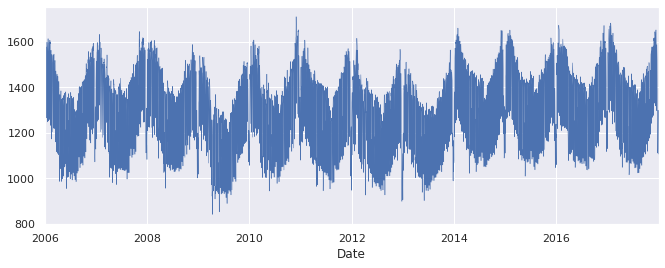

In [86]:
opsd_daily['Consumption'].plot(linewidth=0.5)

We can see that the `plot()` method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. 

However, with so many data points, the line plot is crowded and hard to read. 

Let’s plot the data as dots instead, and also look at the *Solar* and *Wind* time series.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d5e6ea10>,
      dtype=object)

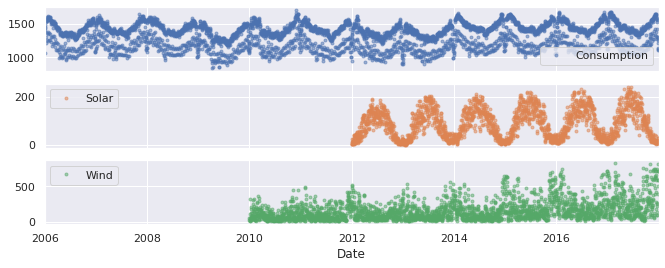

In [87]:
cols_plot = ['Consumption', 'Solar', 'Wind']
opsd_daily[cols_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None',
                           subplots = True)

We can already see some interesting patterns emerge:

* Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.

* Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.

* Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.

* Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.

* There appears to be a strong increasing trend in wind power production over the years.

The plot above suggests there may be some weekly seasonality (a pattern repeats again and again at regular time intervals) in Germany’s electricity consumption, corresponding with weekdays and weekends. 

Let’s plot the time series in a single year to investigate further.

Text(0, 0.5, 'Daily Consumption [GWH]')

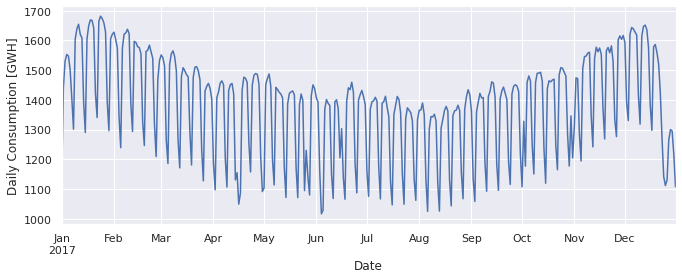

In [88]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption [GWH]')

Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Let’s zoom in further and look at just January and February.

Text(0, 0.5, 'Daily Consumption [GWH]')

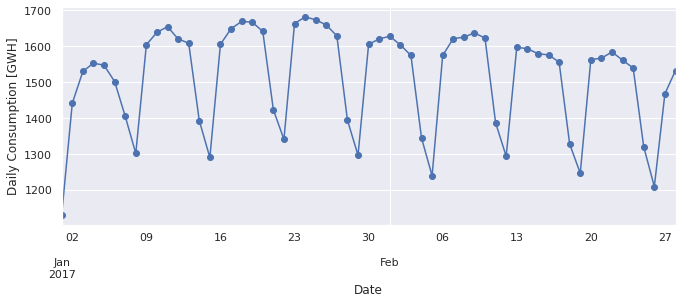

In [89]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker = 'o')
ax.set_ylabel('Daily Consumption [GWH]')

As we suspected, consumption is highest on weekdays and lowest on weekends.

## 4. Resampling

*Resampling* refers to the process of converting a time series from one frequency to another. 

Resampling is similar to a `groupby`: you split the time series into groups (5-day buckets below), apply a function to each group (mean), and combine the result (one row per group).

Aggregating higher frequency data to lower frequency is called **downsampling**, while converting lower frequency to higher frequency is called upsampling. In this module, we will focus only on downsampling.

pandas objects are equipped with a `resample` method which has a similar API to `groupby`. 

You call resample to group the data, then call an aggregation function.

Let's first generate some time series data:

In [90]:
rng = pd.date_range('2001-01-01', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn, index =rng)
ts[:10]

2001-01-01    <built-in method randn of numpy.random.mtrand....
2001-01-02    <built-in method randn of numpy.random.mtrand....
2001-01-03    <built-in method randn of numpy.random.mtrand....
2001-01-04    <built-in method randn of numpy.random.mtrand....
2001-01-05    <built-in method randn of numpy.random.mtrand....
2001-01-06    <built-in method randn of numpy.random.mtrand....
2001-01-07    <built-in method randn of numpy.random.mtrand....
2001-01-08    <built-in method randn of numpy.random.mtrand....
2001-01-09    <built-in method randn of numpy.random.mtrand....
2001-01-10    <built-in method randn of numpy.random.mtrand....
Freq: D, dtype: object

Let's compute monthly averages:

In [116]:
ts.resample('M').sum()


2000-01-31    0.519762
2000-02-29    0.591270
2000-03-31   -0.448530
2000-04-30    0.575657
Freq: M, dtype: float64

If you pass `period` for the `kind` attribute, then the index values will be the months.

In [115]:
ts.resample('M', kind = 'period').sum()

2000-01    0.519762
2000-02    0.591270
2000-03   -0.448530
2000-04    0.575657
Freq: M, dtype: float64

Let’s look at some another example of one-minute data:

In [91]:
rng = pd.date_range('2001-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index =rng)
ts

2001-01-01 00:00:00     0
2001-01-01 00:01:00     1
2001-01-01 00:02:00     2
2001-01-01 00:03:00     3
2001-01-01 00:04:00     4
2001-01-01 00:05:00     5
2001-01-01 00:06:00     6
2001-01-01 00:07:00     7
2001-01-01 00:08:00     8
2001-01-01 00:09:00     9
2001-01-01 00:10:00    10
2001-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [92]:
ts.resample('5min').sum()

2001-01-01 00:00:00    10
2001-01-01 00:05:00    35
2001-01-01 00:10:00    21
Freq: 5T, dtype: int64

By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval but 00:05 is excluded.

### **Inclass Exercise**

Let’s resample the data to a weekly mean time series

In [95]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily [data_columns].resample('W').mean()
opsd_weekly_mean.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-29,1419.077067,485.735571,44.344857,530.080429
2017-11-05,1326.164499,300.840286,49.796857,350.637143
2017-11-12,1472.113604,273.502143,21.129000,294.631143
2017-11-19,1491.885550,329.920000,28.595143,358.515143
2017-11-26,1488.566089,452.703286,25.847857,478.551143
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571


The first row above, labelled `2006-01-01`, contains the mean of all the data contained in the time bin *2006-01-01* through `2006-01-07`. 

The second row, labelled `2006-01-08`, contains the mean data for the *2006-01-08* through *2006-01-14* time bin, and so on. 

By default, each row of the downsampled time series is labelled with the left edge of the time bin.

Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.



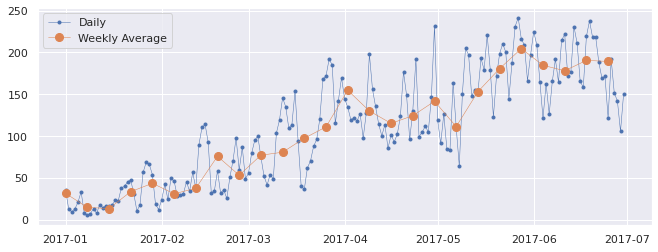

In [96]:
start, end ='2017-01', '2017-06'
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
                       marker= '.', linestyle = '-', linewidth = 0.5,
                       label = 'Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
                       marker= 'o', markersize=8, linestyle = '-', linewidth = 0.5,
                       label = 'Weekly Average')
ax.legend()

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

## 5 Shifting (Leading and Lagging) Data

**Shifting** refers to moving data backward and forward through time. 

Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [97]:
import numpy as np

ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.519762
2000-02-29    0.591270
2000-03-31   -0.448530
2000-04-30    0.575657
Freq: M, dtype: float64

In [98]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.519762
2000-04-30    0.591270
Freq: M, dtype: float64

In [99]:
ts.shift(-2)

2000-01-31   -0.448530
2000-02-29    0.575657
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

As you see above, when we shift like this, missing data is introduced either at the start or the end of the time series.

You can use the `freq` argument to shift the timestamps instead of the data. 

For example the following code will advance the months by 2.

In [100]:
ts.shift(2, freq = 'M')

2000-03-31    0.519762
2000-04-30    0.591270
2000-05-31   -0.448530
2000-06-30    0.575657
Freq: M, dtype: float64

For example the following code will advance the days by 3.

In [101]:
ts.shift(3, freq = 'D')

2000-02-03    0.519762
2000-03-03    0.591270
2000-04-03   -0.448530
2000-05-03    0.575657
dtype: float64

## 6. Moving/Rolling Windows
Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. 

However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and “roll” along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series.

By default, all data points within a window are equally weighted in the aggregation, but this can be changed by specifying window types such as Gaussian, triangular, and others. We’ll stick with the standard equally weighted window here.

### **Inclass Exercise**

Let’s use the `rolling()` method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint, so the rolling windows are:

* 2006-01-01 to 2006-01-07 — labelled as 2006-01-04
* 2006-01-02 to 2006-01-08 — labelled as 2006-01-05
* 2006-01-03 to 2006-01-09 — labelled as 2006-01-06
and so on.

In [108]:
opsd_7d = opsd_daily[data_columns].rolling(7, center = True).mean()
opsd_7d[:20]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


We can see that the first non-missing rolling mean value is on 2006-01-04, because this is the midpoint of the first rolling window.

To visualize the differences between rolling mean and resampling, let’s update our earlier plot of January-June 2017 solar power production to include the 7-day rolling mean along with the weekly mean resampled time series and the original daily data.

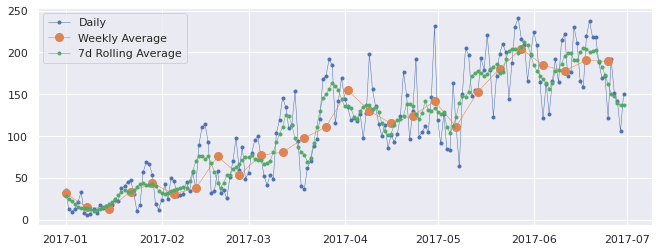

In [109]:
start, end ='2017-01', '2017-06'
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc[start:end, 'Solar'],
                       marker= '.', linestyle = '-', linewidth = 0.5,
                       label = 'Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
                       marker= 'o', markersize = 8, linestyle = '-', linewidth = 0.5,
                       label = 'Weekly Average')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
                       marker= '.', linestyle = '-', linewidth = 0.5,
                       label = '7d Rolling Average')
ax.legend()

We can see that data points in the rolling mean time series have the same spacing as the daily data, but the curve is smoother because higher frequency variability has been averaged out. 

In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. 

In [110]:
opsd_365d = opsd_daily[data_columns].rolling(window = 365, center = True).mean()
opsd_365d[opsd_365d['Consumption'].isnull()== False]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-07-02,1339.913797,NaN,NaN,NaN
2006-07-03,1340.077247,NaN,NaN,NaN
2006-07-04,1340.176282,NaN,NaN,NaN
2006-07-05,1340.255879,NaN,NaN,NaN
2006-07-06,1340.413704,NaN,NaN,NaN
...,...,...,...,...
2017-06-28,1383.323956,276.907532,98.511414,375.418945
2017-06-29,1383.337608,277.705981,98.496926,376.202907
2017-06-30,1383.335391,278.847293,98.461156,377.308449


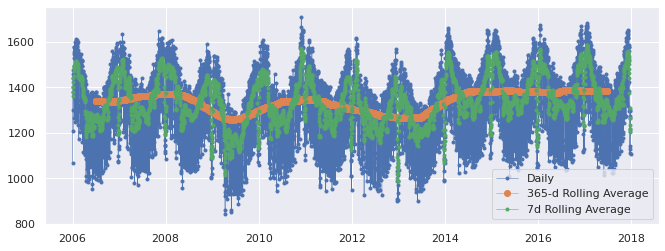

In [111]:
start, end ='2017-01', '2017-06'
fig, ax = plt.subplots()

ax.plot(opsd_daily['Consumption'],
                       marker= '.', linestyle = '-', linewidth = 0.5,
                       label = 'Daily')

ax.plot(opsd_365d['Consumption'],
                       marker= 'o', linestyle = '-', linewidth = 0.5,
                       label = '365-d Rolling Average')
ax.plot(opsd_7d['Consumption'],
                       marker= '.', linestyle = '-', linewidth = 0.5,
                       label = '7d Rolling Average')
ax.legend()

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

Now let’s look at trends in wind and solar production.

In [112]:
#YOUR CODE GOES HERE

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.

To compare with the rolling windows method, let's compute the yearly mean with the `resample` method and visualize the result.

In [113]:
#YOUR CODE GOES HERE

In [114]:
#YOUR CODE GOES HERE

Some additional resources on TIme Series analysis:

* https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/

* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

* https://tomaugspurger.github.io/modern-7-timeseries